 Dog vs. Cat classifier using CNN (Convolutional Neural Networks):

1, pip install tensorflow keras numpy matplotlib opencv-python scikit-learn

2, Organise your dataset
/content/Animal Images/
├── Animal Images/
│   ├── Cat/
│   ├── Dog/



3, Read and preprocess images using tensorflow.keras.preprocessing.image.ImageDataGenerator:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Animal Images.zip to Animal Images.zip


In [ ]:
import zipfile
zip_path = '/content/Animal Images.zip'  # Path to the uploaded ZIP file
extract_path = '/content/Animal Images'  # Destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Done!")


Extraction Done!


# New Section

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    validation_split=0.2   # Split 80% train, 20% validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    "/content/Animal Images/Animal Images/",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Load validation data
val_generator = datagen.flow_from_directory(
    "/content/Animal Images/Animal Images/",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


Found 24050 images belonging to 2 classes.
Found 6011 images belonging to 2 classes.


4, Build the CNN Model

In [3]:
from tensorflow.keras import layers, models

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))
#If there is no GPU changr runtime type to GPU in GoogleColab.

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Plan for CPU Users:💡 Follow these steps to train efficiently:
✅ Use 64x64 images (instead of 128x128).
✅ Use Transfer Learning (MobileNetV2) instead of a custom CNN.
✅ Increase Batch Size to 64 (if RAM allows).
✅ Use Prefetching to speed up data loading.
✅ Train in short stages (5 epochs, save, continue).
✅ If still too slow, switch to Google Colab for a free GPU.

5, Train the Model

In [4]:
 # Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


752/752 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.5934 - loss: 0.6857 - val_accuracy: 0.6944 - val_loss: 0.5870
Epoch 2/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7381 - loss: 0.5278 - val_accuracy: 0.7228 - val_loss: 0.5550
Epoch 3/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7854 - loss: 0.4539 - val_accuracy: 0.7493 - val_loss: 0.5390
Epoch 4/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8378 - loss: 0.3598 - val_accuracy: 0.7478 - val_loss: 0.5569
Epoch 5/5
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9006 - loss: 0.2374 - val_accuracy: 0.7235 - val_loss: 0.7021


6, Evaluate and Test

Evaluate the model:

In [5]:
model.evaluate(val_generator)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7188 - loss: 0.7074


[0.7021359801292419, 0.7235069274902344]

Test with a single image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


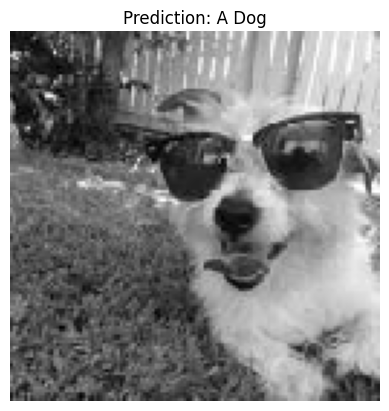

Predicted Label: A Dog
Confidence Score: 0.8309


In [19]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_single_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]

    # Show the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    plt.show()

    # Print result
    print(f"Predicted Label: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    print(f"Confidence Score: {prediction:.4f}")

# Example usage with a specific image
test_image_path = "/content/Animal Images/Animal Images/dogs/2013-04-21_439203031841322411.jpg"  # Replace with an actual image path
predict_single_image(test_image_path, model)


Random Picture from Dataset of cats and dogs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


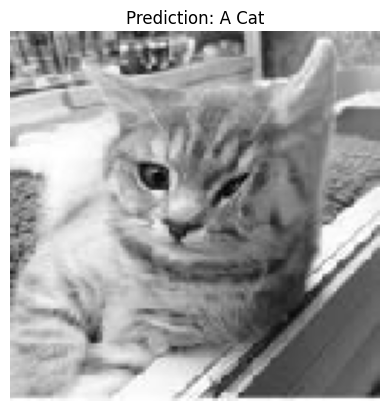

Predicted Label: A Cat
Confidence Score: 0.0031


In [20]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_single_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]

    # Show the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    plt.show()

    # Print result
    print(f"Predicted Label: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    print(f"Confidence Score: {prediction:.4f}")

def get_random_image_from_folder(folder_path):
    # List all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    # Choose a random image file
    random_image = random.choice(image_files)

    # Return the full path of the image
    return os.path.join(folder_path, random_image)

# Paths to the cats and dogs folders
cats_folder = "/content/Animal Images/Animal Images/cats/"
dogs_folder = "/content/Animal Images/Animal Images/dogs/"

# Randomly select a folder (cats or dogs) and get a random image
random_folder = random.choice([cats_folder, dogs_folder])
random_image_path = get_random_image_from_folder(random_folder)

# Predict the randomly selected image
predict_single_image(random_image_path, model)


Upload your Dog/Cat Picture Now!!

Saving cat234.jpg to cat234.jpg
Uploaded Image: cat234.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


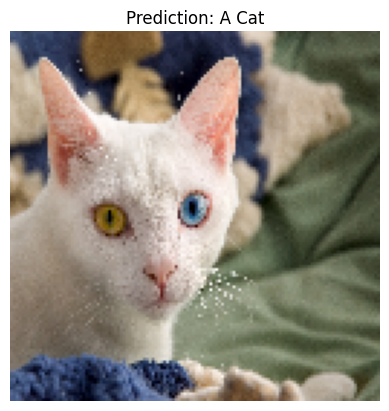

Predicted Label: A Cat
Confidence Score: 0.1595


In [21]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Function to predict if the uploaded image is a dog or a cat
def predict_single_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)[0][0]

    # Show the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    plt.show()

    # Print result
    print(f"Predicted Label: {'A Dog' if prediction > 0.5 else 'A Cat'}")
    print(f"Confidence Score: {prediction:.4f}")

# Upload new image dynamically
uploaded = files.upload()

# Get the uploaded file name
uploaded_image = list(uploaded.keys())[0]
print(f"Uploaded Image: {uploaded_image}")

# Call the prediction function with the uploaded image
predict_single_image(uploaded_image, model)
